<p align="center">
  <img src="https://i.ibb.co/rF4F9kx/logo.png">
</p>

# Abstract:
**ScaleneWorks** supports several information technology (IT) companies in India with their talent acquisition. One of the challenge they face is about **30%** of the candidates who accept the jobs offers, do not join the company. This lead to
huge loss of revenue and time as the companies initiate the recruitment
process again to fill the workforce demand. So scaleneWorks want to find out if a model can be build to predict the likelihood of a candidate joining the
company. If the likelihood is high, then the company can go ahead and offer
the jobs to the candidates.

# DataSet Description:

**Candidate**: Reference number; it is a unique to identify the candidate.

**DOJextended**: Binary variable identifying candidate asked for date of joining extension (yes/no).

**Duration to accept the offer**: Number of days taken by the candidate to accept the offer (Scale variable).

**Notice Period**: Notice period to be served in the parting company before candidate can join this company.

**Offered band**: Band offered to the candidate based on experience, performance in the interview rounds (E0/E1/E2/E3).

**Percentage hike expected**: Percentage hike expected by the candidate (Scale variable).

**Percentage hike offered**: Percentage hike offered by the company (Scale variable).

**Joining bonus**: Binary variable indicating if joining bonus was given or not (yes/no).

**Gender**: Gender of the candidate (male/female).

**Candidate source**: Source form which resume of the candidates was obtained (Employee referral/Agency/Direct).

**REX (in yrs)**: Relevant years of experience of the candidate for the position offered.

**LOB**: Line of business for which offer was rolled out.

**Age**: Age of the candidate.

**Joining location**: Company location for which the offer was rolled out for the candidate to join.

**Candidate relocation status**: Binary Variable indicating whether the candidate has to relocate from one city to another city for joining (yes/no).

**HR Status**: Final joining status of the candidate (joined/ no joined).

# Insight of Data:

**Number of attributes:** 18

**Target attribute:** Status

**Any missing values:** None

# Requirement:
**Python 3.x**

### Basic Libaries:
**Numpy**: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Pandas**: In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.

**Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Matplotlib**: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.

In [0]:
#Import the required libaries.
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#Misc to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Mount Drive
from google.colab import drive
drive.mount('/drive/')

Drive already mounted at /drive/; to attempt to forcibly remount, call drive.mount("/drive/", force_remount=True).


In [0]:
#Change directory 
import os 
os.chdir('/drive/My Drive/data/HR')

In [0]:
#Read the csv using the pandas to df
df = pd.read_csv('HR_data.csv')

In [0]:
#Display first 5 rows
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [0]:
#Checking shape
df.shape

(8995, 18)

In [0]:
#Checking for nan values
df.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [0]:
#Cheking dtype of each attribute
df.dtypes

SLNO                             int64
Candidate.Ref                    int64
DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [0]:
# Display columns
df.columns

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [0]:
#Renaming the column names
df = df.rename(columns={'Candidate.Ref':'Candidate_ref', 'DOJ.Extended':'DOJ_extended', 'Duration.to.accept.offer':'Accept_duration',
       'Notice.period':'Notice_period', 'Offered.band':'Offered_band', 'Pecent.hike.expected.in.CTC':'Percent_hike_expected',
       'Percent.hike.offered.in.CTC':'Percent_hike_offered', 'Percent.difference.CTC':'Percent_difference',
       'Joining.Bonus':'Joining_Bonus', 'Candidate.relocate.actual':'Relocated','Candidate.Source':'Source','Rex.in.Yrs':'Rex'})

In [0]:
df.columns

Index(['SLNO', 'Candidate_ref', 'DOJ_extended', 'Accept_duration',
       'Notice_period', 'Offered_band', 'Percent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'Rex', 'LOB', 'Location', 'Age',
       'Status'],
      dtype='object')

In [0]:
#Rearranging Columns names
df = df[['SLNO', 'Candidate_ref', 'Accept_duration','Notice_period','Percent_hike_expected',
         'Percent_hike_offered', 'Percent_difference','Rex','Age','DOJ_extended','Offered_band'
         ,'Joining_Bonus', 'Relocated', 'Gender','Source', 'LOB', 'Location','Status']]

In [0]:
df.head()

,SLNO,Candidate_ref,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,1,2110407,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,2,2112635,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,3,2112838,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,4,2115021,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,5,2115125,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [0]:
#Copying the df to df1
df1 = df.copy()

In [0]:
#Dropping SLNO which is just like an Index
df1.drop('SLNO',1,inplace=True)

In [0]:
#Review the first 5 rows
df1.head()

,Candidate_ref,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,2110407,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,2112635,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,2112838,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,2115021,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,2115125,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [0]:
df1.columns

Index(['Candidate_ref', 'Accept_duration', 'Notice_period',
       'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference',
       'Rex', 'Age', 'DOJ_extended', 'Offered_band', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'LOB', 'Location', 'Status'],
      dtype='object')

In [0]:
#Extracting catgorical varibles
cat = ['DOJ_extended','Offered_band', 'Joining_Bonus', 'Relocated', 
       'Gender','Source', 'LOB', 'Location', 'Status']

### Let's Talk with data 

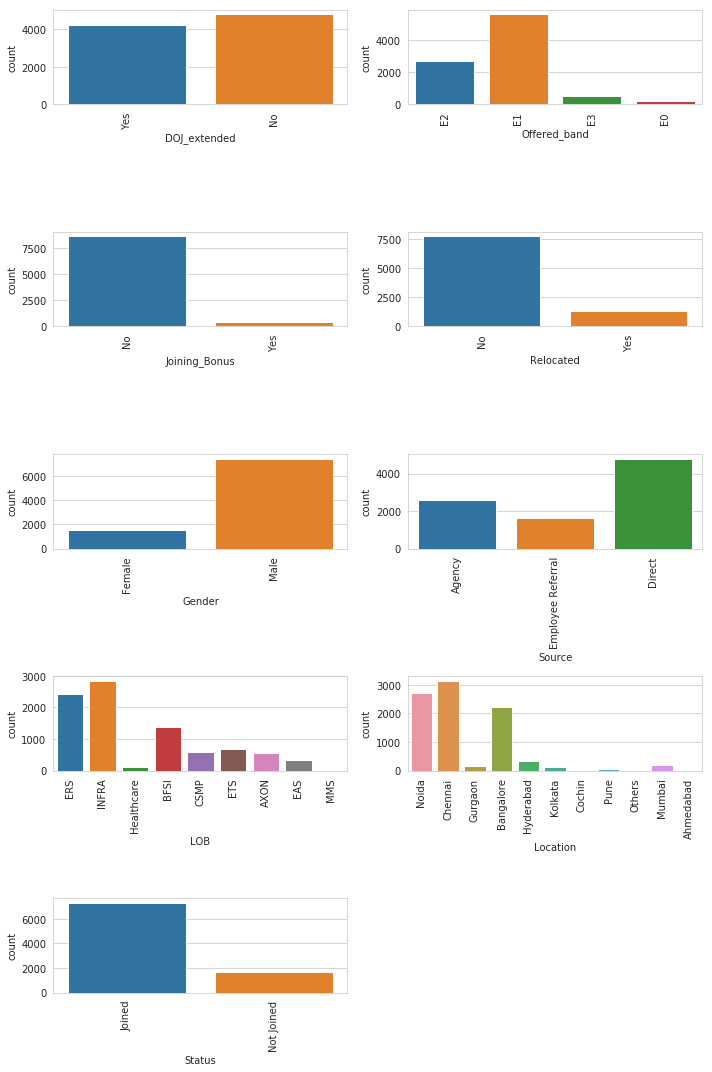

In [0]:
#Count plot for the catgorical varibles
fig=plt.subplots(figsize=(10,15))
length=len(cat)
for i,j in itertools.zip_longest(cat,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df1)
    plt.xticks(rotation=90)
    plt.tight_layout()

## Observation from the above plots
1. Most of the candidates **didn't asked** for date of joining extension (DOJ).
2. Band offered to the candidate based on experience, performance in the interview rounds which is **E1** in most in number.
3. Most of the candidates **has not received** any joining bonus.
4. Most of the candidates **has not relocated** to any new city.
5. Most of the candidates are **Males**.
6. Most of the resumes obtained are **direct** and followed by the **Agency**.
7. Line of business(LOB) for which offer was give is more for **INFRA** and followed by **ERS,BFSI** and others.
8. **Chennai** is the place where most of the candidates got placed later by **Noida & Bangalore**.
9. Most candidates did **Joined** the offered job.

In [0]:
#Getting in numbers
df1['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

In [0]:
#Extracting catgorical varibales to list comp
comp = ['DOJ_extended','Offered_band', 'Joining_Bonus', 'Relocated', 
       'Gender','Source', 'LOB', 'Location']

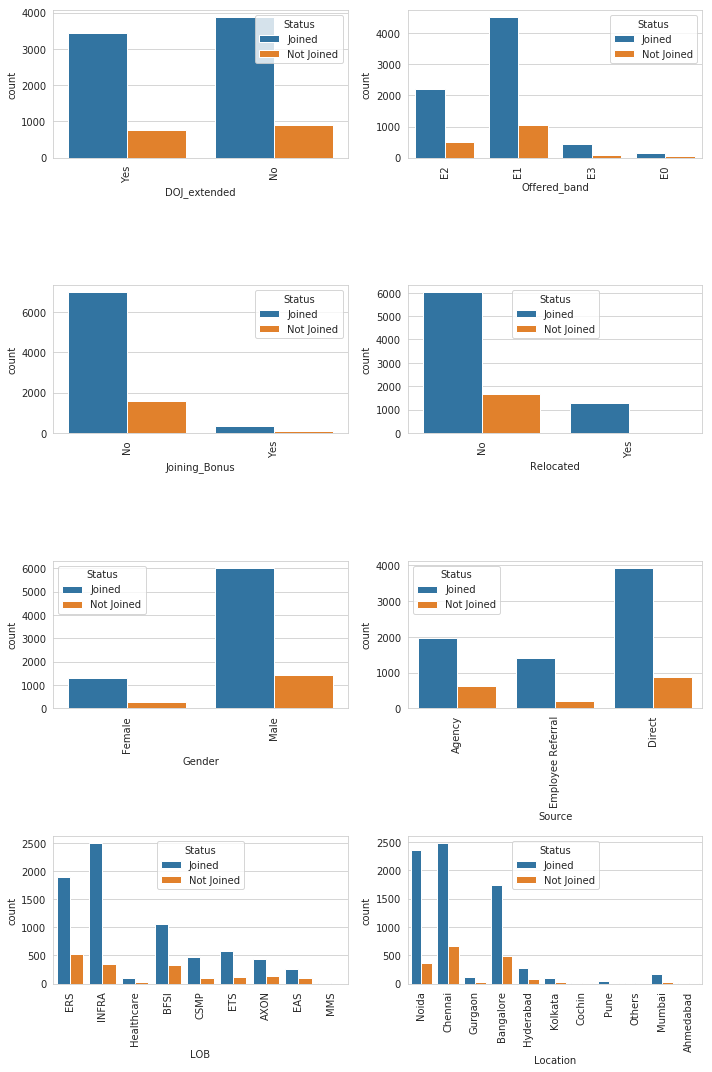

In [0]:
fig=plt.subplots(figsize=(10,15))
length=len(comp)
for i,j in itertools.zip_longest(comp,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df1,hue='Status')
    plt.xticks(rotation=90)
    plt.tight_layout()

From the above observations we can observe most of candidates choose to join the job offered rather than the rejecting it.

In [0]:
#Statstical Info
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Candidate_ref,8995.0,2.843647e+06,486344.774552,2109586.00,2386476.00,2807482.0,3300059.50,3836076.00
Accept_duration,8995.0,2.143446e+01,25.811616,0.00,3.00,10.0,33.00,224.00
Notice_period,8995.0,3.929183e+01,22.220239,0.00,30.00,30.0,60.00,120.00
Percent_hike_expected,8995.0,4.386480e+01,29.788975,-68.83,27.27,40.0,53.85,359.77
Percent_hike_offered,8995.0,4.065736e+01,36.064060,-60.53,22.09,36.0,50.00,471.43
Percent_difference,8995.0,-1.573802e+00,19.610729,-67.27,-8.33,0.0,0.00,300.00
Rex,8995.0,4.239022e+00,2.547571,0.00,3.00,4.0,6.00,24.00
Age,8995.0,2.991317e+01,4.097912,20.00,27.00,29.0,34.00,60.00


In [0]:
#Dropping the "Candidate_ref" because it is just a unique id given to candidate like random genrated index ID
df1.drop('Candidate_ref',1,inplace=True)

In [0]:
#Head
df1.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


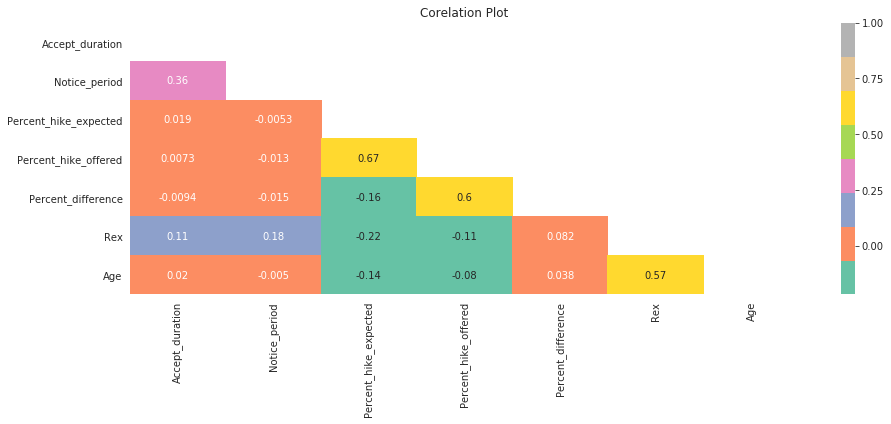

In [0]:
#Corelationship plot
fig,ax=plt.subplots(figsize=(15,5))
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(df1.corr())] = True
sns.heatmap(df1.corr(),cmap='Set2',annot=True,mask=mask,ax=ax)
plt.title('Corelation Plot')
plt.show()

We can see some relationship between the 
> **Percent_hike_offered & Percent_hike_excpected**

> **Percent_difference & Percent_hike_offered** 

> **Age & Rex**





In [0]:
#Independented Varibales
x = df1.iloc[:,:-1]
x.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location
0,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida
1,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai
2,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida
3,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida
4,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida


In [0]:
#Dependented Varibales
y = df1.iloc[:,-1]
y.head()

0    Joined
1    Joined
2    Joined
3    Joined
4    Joined
Name: Status, dtype: object

In [0]:
#Check unique attributes
df1['Status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

In [0]:
#Encoding the dependented variable to binary > Joined to '0' Not Joined to '1'
y.replace(['Joined','Not Joined'],[0,1],inplace=True)

In [0]:
#Checking is replaced are not
y.unique()

array([0, 1])

### Creating Dummies

In [0]:
xd = pd.get_dummies(x,drop_first=True)

In [0]:
xd.keys()

Index(['Accept_duration', 'Notice_period', 'Percent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age',
       'DOJ_extended_Yes', 'Offered_band_E1', 'Offered_band_E2',
       'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 'Gender_Male',
       'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP',
       'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA',
       'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'],
      dtype='object')

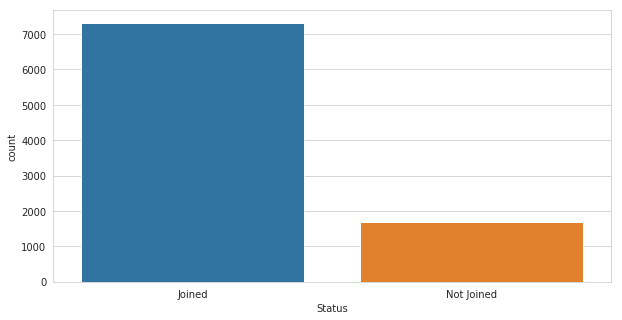

In [0]:
#Count plot for the Target variable
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df['Status'],ax=ax,)
plt.show()

From all above observation we can observe the **target variable** which is "Status" is inbalance in nature which is we can observe from above plot number of candidates joined are more in number than the Not Joined once. Even though the model accuracy is good enough but the predications made are wrong we knew it. So inorder the make dataset balance in nature we shall use the **Synthetic Minority Oversample TechniquE ( SMOTE )** for it to make it balance.

### Balancing the dataset using the SMOTE

In [0]:
#Importing the imblearn
import imblearn
from imblearn.over_sampling import SMOTE #Importing SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(xd,y) #resample fit

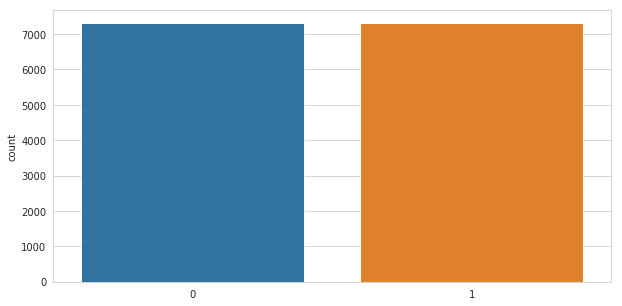

In [0]:
#Count plot
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resam),ax=ax)
plt.show()

From above observation we can see the **target variable which is 'y' (Status)** got balance

## Train Test

In [0]:
#Random seed
np.random.seed(1001)

In [0]:
#Importing train & test split
from sklearn.model_selection import train_test_split

In [0]:
#Spliting to train,test
x_train,x_test,y_train,y_test = train_test_split(x_resam,y_resam,test_size=0.2)

In [0]:
#Checking shape of train,test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 34), (2926, 34), (11700,), (2926,))

In [0]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [0]:
#model_1 as Logistic class
model_1 = LogisticRegression()

In [0]:
#Fit model
model_1.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#A custom module for classification report, ROC_AUC curve
import innomatics

In [0]:
#Predicating the y_train with model_1
y_train_pred = model_1.predict(x_train)

In [0]:
#considering only postive prob
y_train_pred_prob = model_1.predict_proba(x_train)[:,1] 

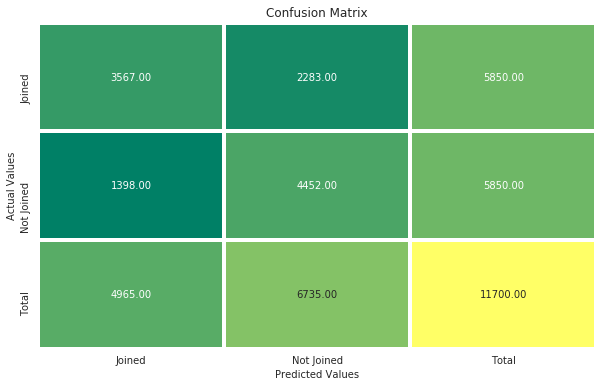

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.72      0.61      0.66      5850
           1       0.66      0.76      0.71      5850

    accuracy                           0.69     11700
   macro avg       0.69      0.69      0.68     11700
weighted avg       0.69      0.69      0.68     11700


************************************Kappa Score************************************


Kappa Score = 0.37076923076923074

******************************Area Under Curve Score******************************


AUC Score = 0.6853846153846154
Number of probabilities to build ROC = 4611


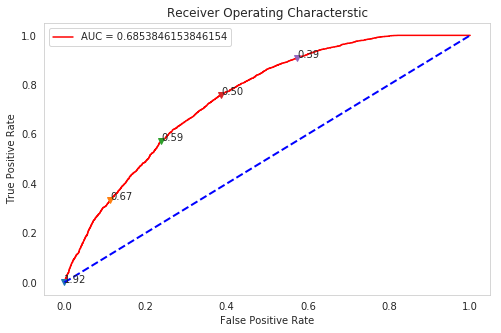

In [0]:
innomatics.classification_metric(y_train,y_train_pred,y_train_pred_prob,['Joined','Not Joined'],n=950,verbose=True)

From the ROC we can see the we can see the **0.50** begin best fit threshold value, but let us find it from the MLE

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()

In [0]:
tn, fp, fn, tp

(3567, 2283, 1398, 4452)

In [0]:
y_test_pred = model_1.predict(x_test)

In [0]:
y_test_pred_prob = model_1.predict_proba(x_test)[:,1] #considering only postive prob

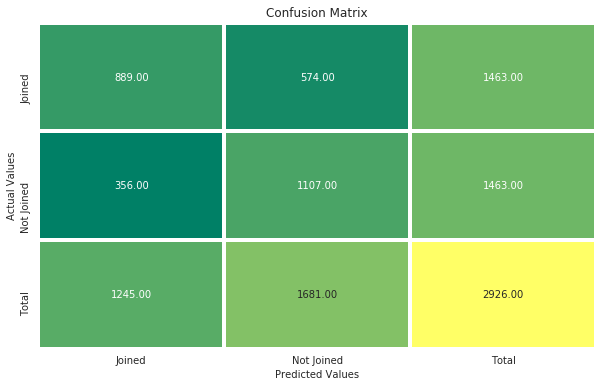

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1463
           1       0.66      0.76      0.70      1463

    accuracy                           0.68      2926
   macro avg       0.69      0.68      0.68      2926
weighted avg       0.69      0.68      0.68      2926


************************************Kappa Score************************************


Kappa Score = 0.36431989063568015

******************************Area Under Curve Score******************************


AUC Score = 0.68215994531784
Number of probabilities to build ROC = 1187


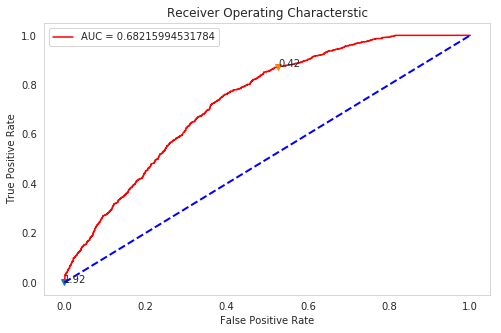

In [0]:
innomatics.classification_metric(y_test,y_test_pred,y_test_pred_prob,['Joined','Not Joined'],n=950,verbose=True)

### Lets us get some threshold value were the loss is minimum using the MLE (**Maximun Likehood Estimation**)

In [0]:
#Define threshold class to pre
pre = innomatics.threshold()

In [0]:
#Import logloss
from sklearn.metrics import log_loss

In [0]:
probailites = np.linspace(0,1,num=100) #Genrating 100 values in between 0-1
mle = []
for p in probailites:
  pre.th = p
  yy = pd.Series(y_train_pred_prob)
  y_pred = yy.apply(pre.predict_threshold)
  loss = log_loss(y_train,y_pred)
  mle.append(loss)

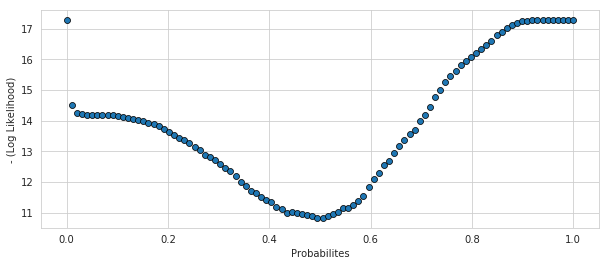

In [0]:
#Plot for minimum Logloss
plt.figure(figsize=(10,4))
sns.scatterplot(probailites,mle,edgecolor='k')
plt.xlabel('Probabilites')
plt.ylabel('- (Log Likelihood)')
plt.show()

We can observe the Log likehood is minimum in between the **0.4 - 0.57 (approx)** from the above plot

In [0]:
#Getting minimum Logloss
min_ind = np.array(mle).argmin()
val = probailites[min_ind]
print('Threshold Probability Value = ',val.round(6))


Threshold Probability Value =  0.505051


### Apply Threshold Probability on the Train & Test data

In [0]:
pre.th = val
yy_test = pd.Series(y_test_pred_prob)
yy_train = pd.Series(y_train_pred_prob)
y_pred_test = yy_test.apply(pre.predict_threshold)
y_pred_train = yy_train.apply(pre.predict_threshold)

In [0]:
cr = classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1463
           1       0.66      0.75      0.70      1463

    accuracy                           0.68      2926
   macro avg       0.68      0.68      0.68      2926
weighted avg       0.68      0.68      0.68      2926



In [0]:
cr = classification_report(y_train,y_pred_train)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.62      0.66      5850
           1       0.66      0.75      0.71      5850

    accuracy                           0.69     11700
   macro avg       0.69      0.69      0.69     11700
weighted avg       0.69      0.69      0.69     11700



## Feature Selection

### Before going to feature selection we can see some multicolinearity (*from co-relation plot*) between the varibales.
## Using VIF (Variance Inflation Factor) for checking the colinearity.

In [0]:
#Import Standard Scaler
from sklearn.preprocessing import StandardScaler

In [0]:
#Assign class to sc
sc = StandardScaler()

In [0]:
#Standardzation x values 
x_stand = sc.fit_transform(xd)

In [0]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
vif = pd.DataFrame()
vif["Score"] = [variance_inflation_factor(x_stand,i) for i in range(len(xd.keys()))]

In [0]:
#View VIF
vif.index = xd.columns
vif.head(8)

,Score
Accept_duration,1.332962
Notice_period,1.241784
Percent_hike_expected,16.694430
Percent_hike_offered,25.107837
Percent_difference,14.243712
Rex,3.072918
Age,1.565220
DOJ_extended_Yes,1.221115


**Precent_hike_expected**, **Percent_hike_offered**, **Percent_difference** have some **VIF** greater than 10 which are highly corelated, and sometimes the categorical values have higher VIF (inf) we can ignore them.

### using **recursive feature elimination and cross-validated** for optimal feature selection

In [0]:
#Importing REFCV
from sklearn.feature_selection import RFECV

In [0]:
#Using estimator as LogisticsRegression with Step1 and cross-validation of 10 scoring metric as average_precision
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='average_precision')
rfecv.fit(xd, y)

RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='average_precision',
      step=1, verbose=0)

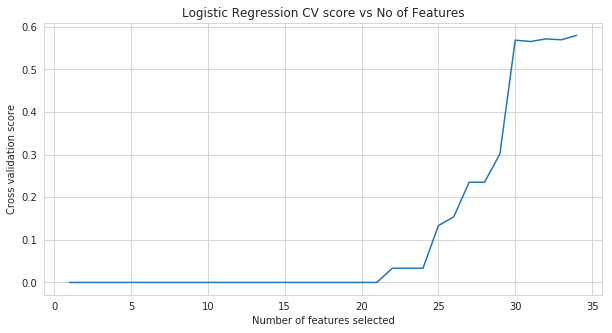

In [0]:
plt.figure(figsize=(10,5))
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
#Getting the selected features 
feature_names = xd.columns
selected_features = feature_names[rfecv.support_].tolist()
print("No of Features = {}\nNo of Feature Selected = {}\n {} ".format(len(feature_names),len(selected_features),selected_features))

No of Features = 34
No of Feature Selected = 33	
 ['Notice_period', 'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age', 'DOJ_extended_Yes', 'Offered_band_E1', 'Offered_band_E2', 'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 'Gender_Male', 'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai', 'Location_Noida', 'Location_Others', 'Location_Pune'] 


In [0]:
#New dataframe using the selected features
xf = xd[['Notice_period', 'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age', 'DOJ_extended_Yes', 
         'Offered_band_E1', 'Offered_band_E2', 'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 
         'Gender_Male', 'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 
         'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon', 
         'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai', 'Location_Noida', 'Location_Others', 'Location_Pune']]

In [0]:
#View
xf.head(3)

,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended_Yes,Offered_band_E1,Offered_band_E2,Offered_band_E3,Joining_Bonus_Yes,Relocated_Yes,Gender_Male,Source_Direct,Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,30,-20.79,13.16,42.86,7,34,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,30,50.00,320.00,180.00,8,34,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,45,42.84,42.84,0.00,4,27,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#Resampling with the selected features
xf_re,y_re = SMOTE(k_neighbors=5).fit_resample(xf,y)

In [0]:
#Spliting to train,test
xf_train,xf_test,yf_train,yf_test = train_test_split(xf_re,y_re,test_size=0.2)

In [0]:
#Checking shape of train,test
xf_train.shape,xf_test.shape,yf_train.shape,yf_test.shape

((11700, 33), (2926, 33), (11700,), (2926,))

In [0]:
#model_2 as Logistic class
model_2 = LogisticRegression()

In [0]:
#Fit model
model_2.fit(xf_train,yf_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Predicating the y_train with new build model
yf_train_pred = model_2.predict(xf_train)

In [0]:
#considering only postive prob
yf_train_pred_prob = model_2.predict_proba(xf_train)[:,1] 

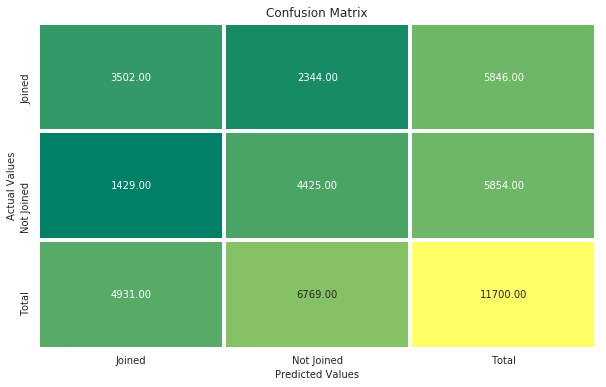

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.71      0.60      0.65      5846
           1       0.65      0.76      0.70      5854

    accuracy                           0.68     11700
   macro avg       0.68      0.68      0.68     11700
weighted avg       0.68      0.68      0.68     11700


************************************Kappa Score************************************


Kappa Score = 0.3549734497012521

******************************Area Under Curve Score******************************


AUC Score = 0.6774677431363545
Number of probabilities to build ROC = 4605


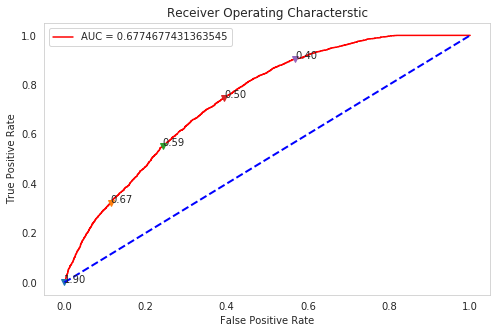

In [0]:
innomatics.classification_metric(yf_train,yf_train_pred,yf_train_pred_prob,['Joined','Not Joined'],n=950,verbose=True)

In [0]:
#Getting TN FP FN TP
tn, fp, fn, tp = confusion_matrix(yf_train,yf_train_pred).ravel()

In [0]:
tn, fp, fn, tp

(3502, 2344, 1429, 4425)

### Given criteria:
Cost of predicting **“Not Joining” as “Joining” (FPs) cases is 3 times
more than predicting “Joining” as “Not Joining” (FNs)**
From above we can see **FP's**:2344, **FN's**:1429 which is FP's are ~1.64 greater than FN's we doesn't satifies the conditions

_from the_ **_above ROC_AUC _curve_** it is clear that the threshold probality value should be decreased in order to satifies the given criteria. but lets us find the point were the FP's to FN's ratio increase are decrease

In [0]:
#A Simple loop to fit the given criteria 
probailites = np.linspace(0,1,num=100) #Genrating 100 values in between 0-1
FP = [] #Store the genrated FP's in the list FP
FN = [] #Store the genrated FN's in the list FN
for p in probailites:
  pre.th = p
  yyf = pd.Series(yf_train_pred_prob)
  yf_pred = yyf.apply(pre.predict_threshold)
  tn, fp, fn, tp = confusion_matrix(yf_train,yf_pred).ravel()
  FP.append(fp)
  FN.append(fn)

In [0]:
#Simple DataFrame to get the ratio between the FP's & FN's
FPS = pd.DataFrame(index=probailites) #Making index as probailies
FPS['FP'] = FP #Adding the FP
FPS['FN'] = FN #Adding the FN
FPS['Ratio'] = np.array(FP)/np.array(FN) #Finding the ratio between them

In [0]:
#View
FPS.head()

,FP,FN,Ratio
0.000000,5846,0,inf
0.010101,4924,0,inf
0.020202,4836,0,inf
0.030303,4827,0,inf
0.040404,4824,0,inf


In [0]:
#Filterting the ratio to be greater than '3'
FPS[FPS["Ratio"]>3]

,FP,FN,Ratio
0.000000,5846,0,inf
0.010101,4924,0,inf
0.020202,4836,0,inf
0.030303,4827,0,inf
0.040404,4824,0,inf
0.050505,4823,0,inf
0.060606,4823,0,inf
0.070707,4822,0,inf
0.080808,4821,0,inf
0.090909,4816,0,inf


From above dataframe it is clear that the **ratio between the FP's to FN's** are started to increase from the probability values of **0.4444**

In [0]:
#Predicating the test values
yf_test_pred = model_2.predict(xf_test)

In [0]:
#considering only postive prob
yf_test_pred_prob = model_2.predict_proba(xf_test)[:,1] 

In [0]:
#Predicating again with the new prob value
pre.th = 0.4444
yyf_test = pd.Series(yf_test_pred_prob)
yyf_train = pd.Series(yf_train_pred_prob)
yf_pred_test = yyf_test.apply(pre.predict_threshold)
yf_pred_train = yyf_train.apply(pre.predict_threshold)

In [0]:
#classification report for new genrated values !train
cr = classification_report(yf_train,yf_pred_train)
tn, fp, fn, tp = confusion_matrix(yf_train,yf_pred_train).ravel()
print(cr)
print("TP's = {}\nFP's = {} \nFN's = {} \nTN's = {} ".format(tp, fp, fn, tn))

              precision    recall  f1-score   support

           0       0.77      0.50      0.61      5846
           1       0.63      0.85      0.72      5854

    accuracy                           0.68     11700
   macro avg       0.70      0.68      0.67     11700
weighted avg       0.70      0.68      0.67     11700

TP's = 4951
FP's = 2894 
FN's = 903 
TN's = 2952 


In [0]:
#classification report for new genrated values !test
cr = classification_report(yf_test,yf_pred_test)
tn, fp, fn, tp = confusion_matrix(yf_test,yf_pred_test).ravel()
print(cr)
print("TP's = {}\nFP's = {} \nFN's = {} \nTN's = {} ".format(tp, fp, fn, tn))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63      1467
           1       0.64      0.85      0.73      1459

    accuracy                           0.69      2926
   macro avg       0.71      0.69      0.68      2926
weighted avg       0.71      0.69      0.68      2926

TP's = 1241
FP's = 692 
FN's = 218 
TN's = 775 


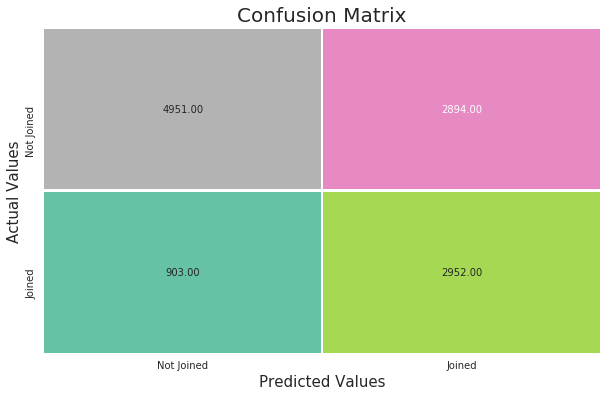

In [0]:
#confusion matrix for new genrated data 
plt.figure(figsize=(10,6))
sns.heatmap(np.array([[4951,2894],[903,2952]]),annot=True,fmt='.2f',cbar=False
            ,xticklabels=['Not Joined','Joined'],yticklabels=['Not Joined','Joined'],cmap='Set2',linewidths=1.5)
plt.xlabel('Predicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

As for the given criteria which is FP's should be 3 time more than the FN's the cut-off probability choosen is **0.4444**

**$\frac{FP's}{FN's}$ ~ 3**

_! Below values are for the train data_

**Precision = $\frac{TP's}{TP's + FP's}$ = $\frac{4951}{4951 + 2894}$ ~ 0.63**

**Recall = $\frac{TP's}{TP's + FN's}$ = $\frac{4951}{4951 + 903}$ ~ 0.85**

